<a href="https://colab.research.google.com/github/SibusisoTL/API-testing/blob/master/Tesla_Stork_Market_Prediction_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
 
import warnings
warnings.filterwarnings('ignore')

In [69]:
df = pd.read_csv('TSLA.csv')

In [70]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,29/06/2010,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,30/06/2010,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,01/07/2010,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,02/07/2010,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,06/07/2010,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [71]:
df.shape

(3160, 7)

In [72]:
df.describe

<bound method NDFrame.describe of             Date        Open        High         Low       Close   Adj Close  \
0     29/06/2010   19.000000   25.000000   17.540001   23.889999   23.889999   
1     30/06/2010   25.790001   30.420000   23.299999   23.830000   23.830000   
2     01/07/2010   25.000000   25.920000   20.270000   21.959999   21.959999   
3     02/07/2010   23.000000   23.100000   18.709999   19.200001   19.200001   
4     06/07/2010   20.000000   20.000000   15.830000   16.110001   16.110001   
...          ...         ...         ...         ...         ...         ...   
3155  10/01/2023  121.070000  122.760002  114.919998  118.849998  118.849998   
3156  11/01/2023  122.089996  125.949997  120.510002  123.220001  123.220001   
3157  12/01/2023  122.559998  124.129997  117.000000  123.559998  123.559998   
3158  13/01/2023  116.550003  122.629997  115.599998  122.400002  122.400002   
3159  17/01/2023  125.699997  131.699997  125.019997  131.490005  131.490005   

     

In [73]:
df.info

<bound method DataFrame.info of             Date        Open        High         Low       Close   Adj Close  \
0     29/06/2010   19.000000   25.000000   17.540001   23.889999   23.889999   
1     30/06/2010   25.790001   30.420000   23.299999   23.830000   23.830000   
2     01/07/2010   25.000000   25.920000   20.270000   21.959999   21.959999   
3     02/07/2010   23.000000   23.100000   18.709999   19.200001   19.200001   
4     06/07/2010   20.000000   20.000000   15.830000   16.110001   16.110001   
...          ...         ...         ...         ...         ...         ...   
3155  10/01/2023  121.070000  122.760002  114.919998  118.849998  118.849998   
3156  11/01/2023  122.089996  125.949997  120.510002  123.220001  123.220001   
3157  12/01/2023  122.559998  124.129997  117.000000  123.559998  123.559998   
3158  13/01/2023  116.550003  122.629997  115.599998  122.400002  122.400002   
3159  17/01/2023  125.699997  131.699997  125.019997  131.490005  131.490005   

       

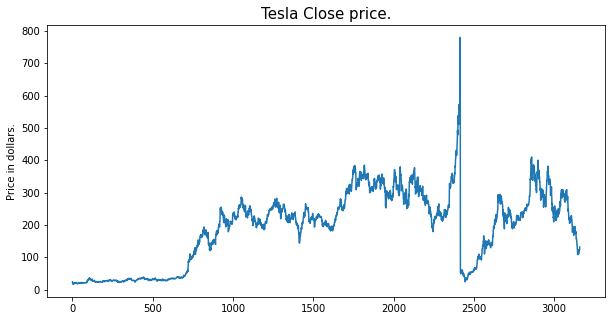

In [74]:
#EDA

plt.figure(figsize=(10,5))
plt.plot(df['Close'])
plt.title('Tesla Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

In [75]:
df = df.drop(['Adj Close'], axis=1)

In [76]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

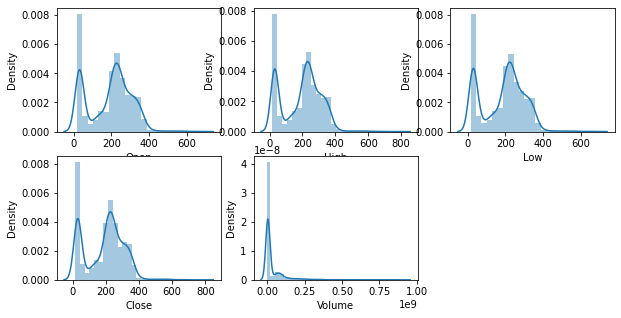

In [77]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']
 
plt.subplots(figsize=(10,5))
 
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.distplot(df[col])
plt.show()

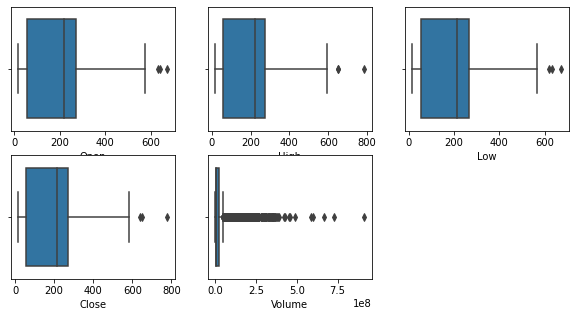

In [78]:

plt.subplots(figsize=(10,5))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.boxplot(df[col])
plt.show()

In [79]:
#Feature Engineering


splitted = df['Date'].str.split('/', expand=True)
 
df['month'] = splitted[1].astype('int')
df['year'] = splitted[0].astype('int')
df['day'] = splitted[2].astype('int')
 
df.head()

,Date,Open,High,Low,Close,Volume,month,year,day
0,29/06/2010,19.000000,25.00,17.540001,23.889999,18766300,6,29,2010
1,30/06/2010,25.790001,30.42,23.299999,23.830000,17187100,6,30,2010
2,01/07/2010,25.000000,25.92,20.270000,21.959999,8218800,7,1,2010
3,02/07/2010,23.000000,23.10,18.709999,19.200001,5139800,7,2,2010
4,06/07/2010,20.000000,20.00,15.830000,16.110001,6866900,7,6,2010


In [80]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()

,Date,Open,High,Low,Close,Volume,month,year,day,is_quarter_end
0,29/06/2010,19.000000,25.00,17.540001,23.889999,18766300,6,29,2010,1
1,30/06/2010,25.790001,30.42,23.299999,23.830000,17187100,6,30,2010,1
2,01/07/2010,25.000000,25.92,20.270000,21.959999,8218800,7,1,2010,0
3,02/07/2010,23.000000,23.10,18.709999,19.200001,5139800,7,2,2010,0
4,06/07/2010,20.000000,20.00,15.830000,16.110001,6866900,7,6,2010,0


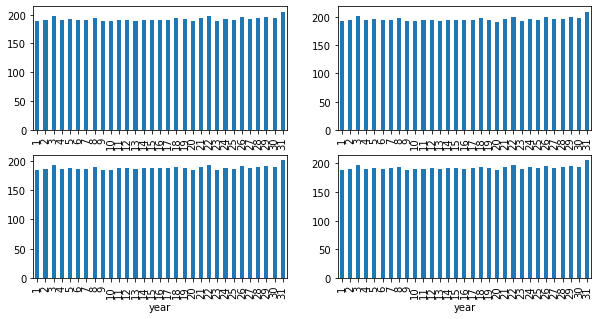

In [81]:
data_grouped = df.groupby('year').mean()
plt.subplots(figsize=(10,5))
 
for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()

In [82]:
df.groupby('is_quarter_end').mean()


,Open,High,Low,Close,Volume,month,year,day
is_quarter_end,,,,,,,,
0,192.252740,196.004493,188.330995,192.340519,3.336885e+07,6.184850,15.669843,2016.258695
1,191.394302,194.947843,187.661344,191.360130,3.596982e+07,7.557964,15.804901,2016.246937


In [83]:
df['open-close']  = df['Open'] - df['Close']
df['low-high']  = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)


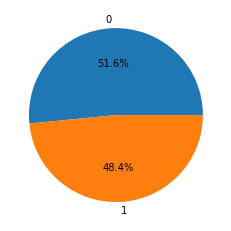

In [84]:
plt.pie(df['target'].value_counts().values,
        labels=[0, 1], autopct='%1.1f%%')
plt.show()

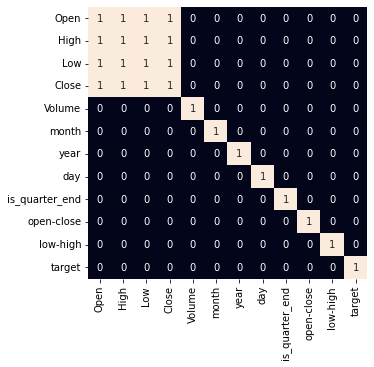

In [85]:
plt.figure(figsize=(5, 5))
 
# As our concern is with the highly
# correlated features only so, we will visualize
# our heatmap as per that criteria only.
sb.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()

In [86]:
#Data Splitting and Normalization

features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']
 
scaler = StandardScaler()
features = scaler.fit_transform(features)
 
X_train, X_valid, Y_train, Y_valid = train_test_split(
    features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)

(2844, 3) (316, 3)


In [87]:
#Model Development and Evaluation
models = [LogisticRegression(), SVC(
  kernel='poly', probability=True), XGBClassifier(), GaussianNB(), KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2), 
  RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)]
 
for i in range(6):
  models[i].fit(X_train, Y_train)
 
  print(f'{models[i]} : ')
  print('Training Accuracy : ', metrics.roc_auc_score(
    Y_train, models[i].predict_proba(X_train)[:,1]))
  print('Validation Accuracy : ', metrics.roc_auc_score(
    Y_valid, models[i].predict_proba(X_valid)[:,1]))
  
  print()

LogisticRegression() : 
Training Accuracy :  0.5157324091837366
Validation Accuracy :  0.5232772435897436

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.5191850980877529
Validation Accuracy :  0.5223958333333333

XGBClassifier() : 
Training Accuracy :  0.719921529797636
Validation Accuracy :  0.5041466346153847

GaussianNB() : 
Training Accuracy :  0.5180449285228046
Validation Accuracy :  0.5141826923076923

KNeighborsClassifier() : 
Training Accuracy :  0.7409755554180333
Validation Accuracy :  0.49487179487179483

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0) : 
Training Accuracy :  0.9963581904820842
Validation Accuracy :  0.471494391025641



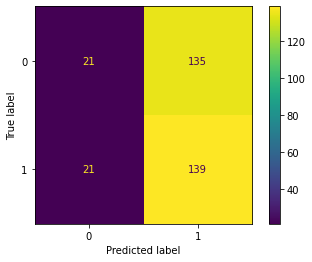

In [88]:
metrics.plot_confusion_matrix(models[0], X_valid, Y_valid)
plt.show()